In [6]:
import pandas as pd
import matplotlib.pyplot as  plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine


# 分类树

官网链接： https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
```


In [7]:
# 导入数据
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
wine.data # 数据

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
wine.target # 标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
wine.feature_names # 特征名称

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
wine.target_names # 标签名

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [12]:
pd_wine = pd.concat([pd.DataFrame(wine.data,columns = wine.feature_names),pd.DataFrame(wine.target)],axis = 1)
pd_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
#划分测试集和训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size = 0.3)

In [24]:
# 实例化
# rondom_state 和 splitter 来控制随机性
clf = tree.DecisionTreeClassifier(criterion = 'entropy' , random_state = 13 , splitter = 'random')
clf = clf.fit(Xtrain,Ytrain)
clf_score = clf.score(Xtest,Ytest)
clf_score

0.9074074074074074

In [ ]:
#节点可视化
dot_data= tree.export_graphviz(clf
                            ,feature_names = wine.feature_names
                            ,class_names = wine.target_names
                            ,filled = True
                            ,rounded = True);
graph = graphviz.Source(dot_data)
graph

[Text(2343.6, 4983.0, 'total_phenols <= 2.106\nentropy = 1.571\nsamples = 124\nvalue = [40, 49, 35]\nclass = class_1'),
 Text(892.8, 4077.0, 'hue <= 0.928\nentropy = 0.979\nsamples = 53\nvalue = [0, 22, 31]\nclass = class_2'),
 Text(446.4, 3171.0, 'flavanoids <= 0.801\nentropy = 0.439\nsamples = 33\nvalue = [0, 3, 30]\nclass = class_2'),
 Text(223.2, 2265.0, 'entropy = 0.0\nsamples = 22\nvalue = [0, 0, 22]\nclass = class_2'),
 Text(669.5999999999999, 2265.0, 'magnesium <= 89.112\nentropy = 0.845\nsamples = 11\nvalue = [0, 3, 8]\nclass = class_2'),
 Text(446.4, 1359.0, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = class_1'),
 Text(892.8, 1359.0, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 8]\nclass = class_2'),
 Text(1339.1999999999998, 3171.0, 'alcohol <= 13.356\nentropy = 0.286\nsamples = 20\nvalue = [0, 19, 1]\nclass = class_1'),
 Text(1116.0, 2265.0, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0]\nclass = class_1'),
 Text(1562.3999999999999, 2265.0, 'color_intensity <= 5

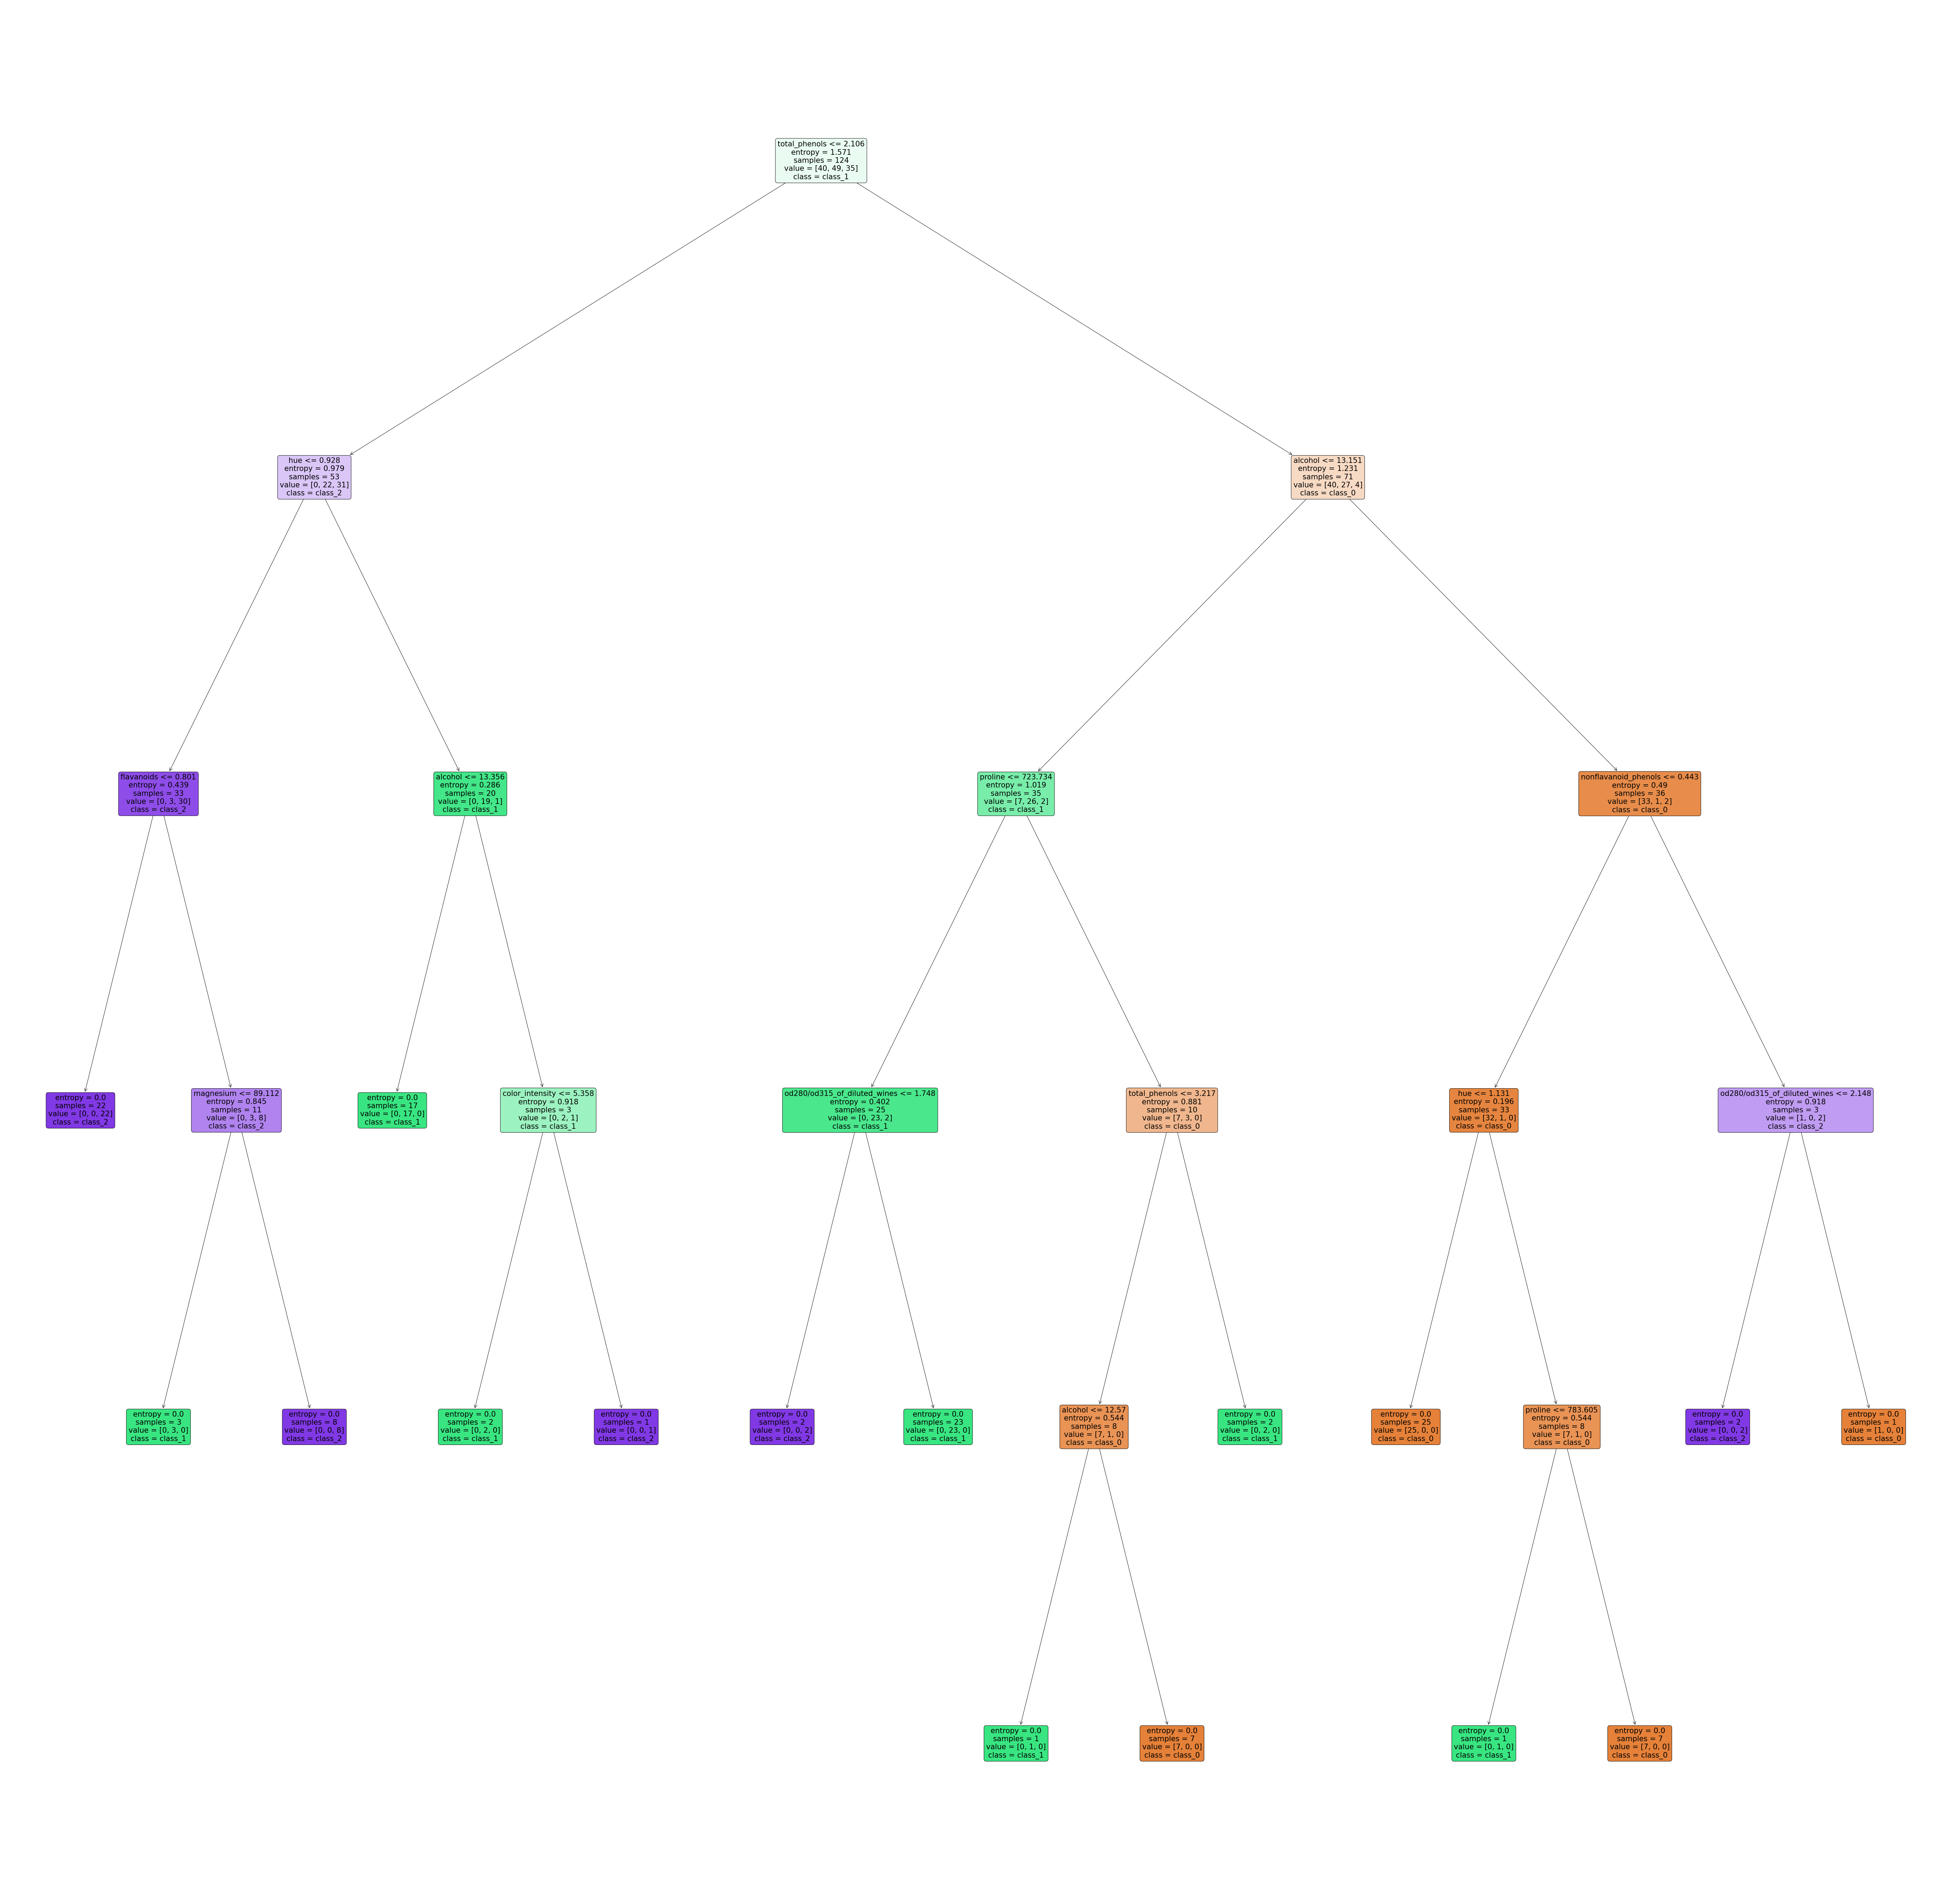

In [30]:
# 节点的可视化
plt.figure(figsize = (100,100))
tree.plot_tree(clf,filled=True,rounded=True,feature_names = wine.feature_names
                            ,class_names = wine.target_names)

In [16]:
clf.feature_importances_

array([0.01834   , 0.0166589 , 0.04578952, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08004084,
       0.06582677, 0.45787236, 0.31547161])

In [17]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.018340001826509144),
 ('malic_acid', 0.016658899553532728),
 ('ash', 0.04578951542538744),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.0),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.08004083860748094),
 ('hue', 0.06582677481010955),
 ('od280/od315_of_diluted_wines', 0.4578723568727766),
 ('proline', 0.31547161290420367)]

# 剪枝参数
- max_depth : 用于控制树的最大深度
- min_samples_split: 节点可以分枝要满足的最小样本量
- min_samples_leaf ： 叶子结点要满足的最小样本量
- max_features & min_impurity_decrease ： 分别用于限制特征的个数和限制信息增益的大小

# 目标权重参数
- class_weight 
- min_weight_fraction_leaf

In [31]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy' , random_state = 13 , splitter = 'random',max_depth = 3)
clf = clf.fit(Xtrain,Ytrain)
clf_score = clf.score(Xtest,Ytest)
clf_score

0.8888888888888888

[Text(1162.5, 1981.875, 'total_phenols <= 2.106\nentropy = 1.571\nsamples = 124\nvalue = [40, 49, 35]\nclass = class_1'),
 Text(581.25, 1415.625, 'hue <= 0.928\nentropy = 0.979\nsamples = 53\nvalue = [0, 22, 31]\nclass = class_2'),
 Text(290.625, 849.375, 'flavanoids <= 0.801\nentropy = 0.439\nsamples = 33\nvalue = [0, 3, 30]\nclass = class_2'),
 Text(145.3125, 283.125, 'entropy = 0.0\nsamples = 22\nvalue = [0, 0, 22]\nclass = class_2'),
 Text(435.9375, 283.125, 'entropy = 0.845\nsamples = 11\nvalue = [0, 3, 8]\nclass = class_2'),
 Text(871.875, 849.375, 'flavanoids <= 0.722\nentropy = 0.286\nsamples = 20\nvalue = [0, 19, 1]\nclass = class_1'),
 Text(726.5625, 283.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = class_1'),
 Text(1017.1875, 283.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18, 0]\nclass = class_1'),
 Text(1743.75, 1415.625, 'proline <= 431.005\nentropy = 1.231\nsamples = 71\nvalue = [40, 27, 4]\nclass = class_0'),
 Text(1453.125, 849.375, 'color_intensity <

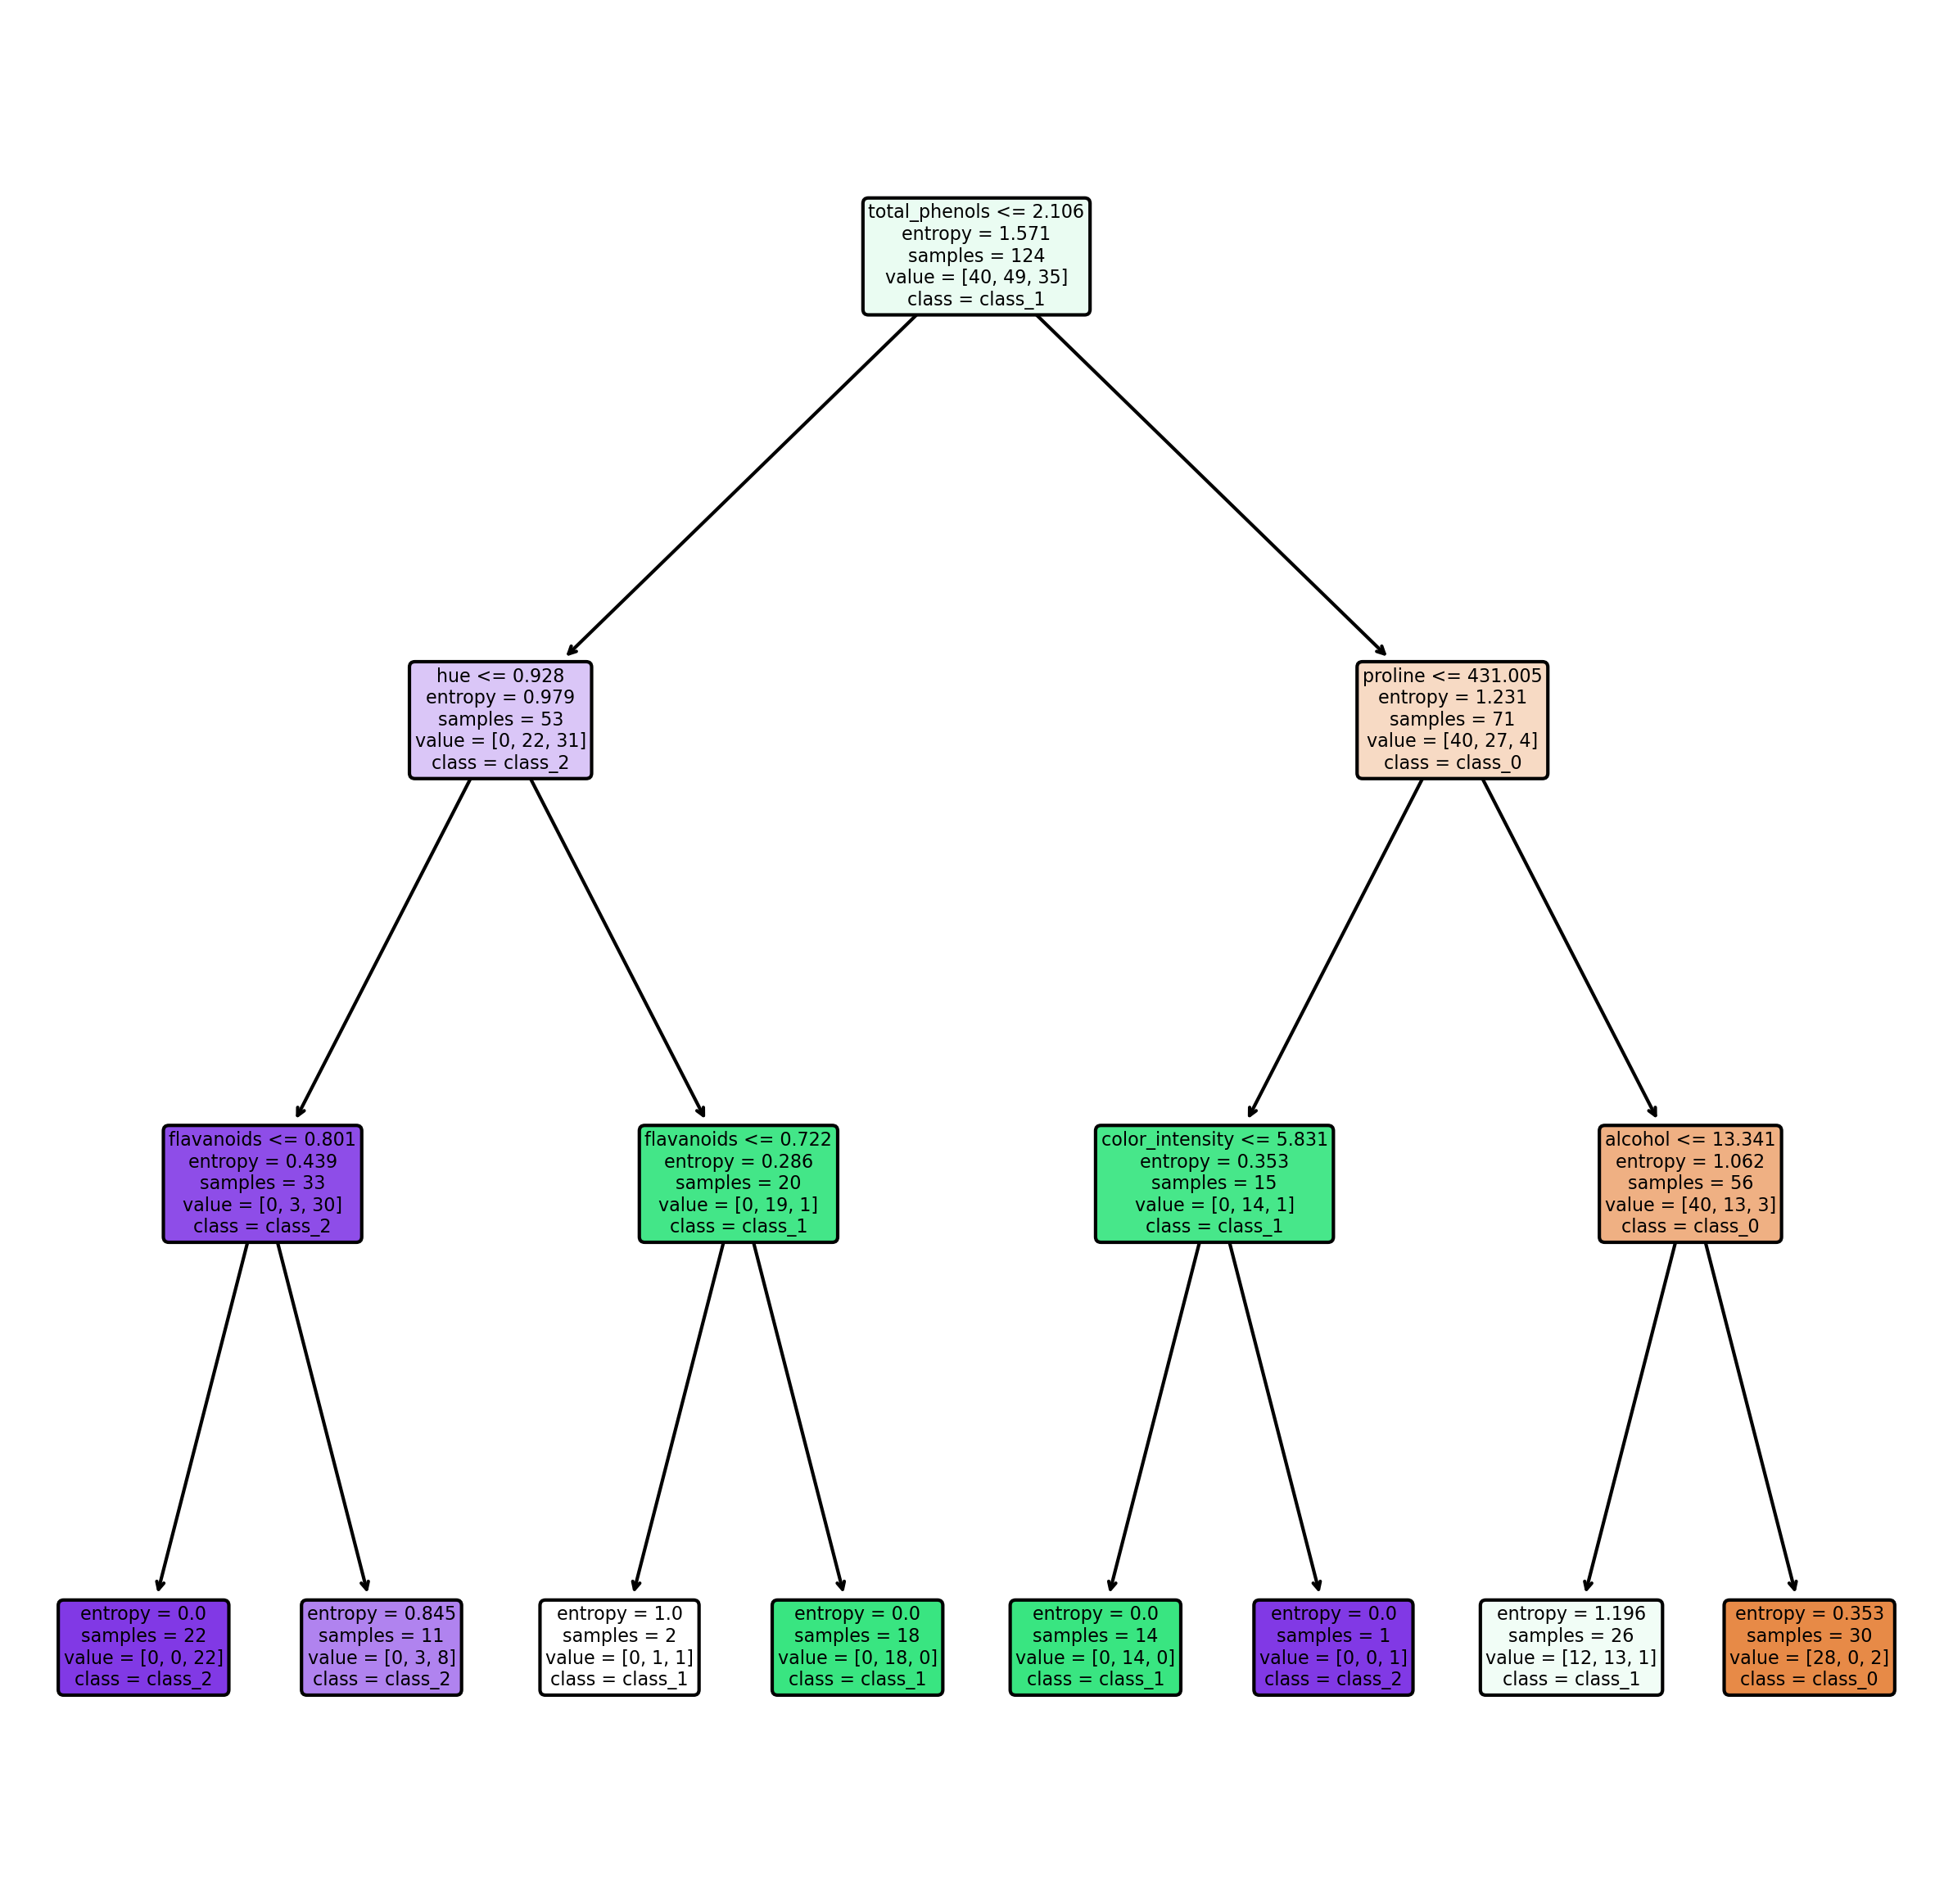

In [36]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf,filled=True,rounded=True,feature_names = wine.feature_names
                            ,class_names = wine.target_names)

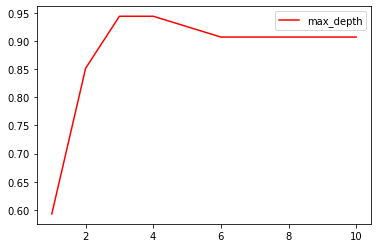

In [38]:
# 超参数学习曲线
test = [];
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1, criterion = 'gini', random_state = 30, splitter = "random")
    clf = clf.fit(Xtrain,Ytrain);
    clf_score = clf.score(Xtest,Ytest);
    test.append(clf_score);
plt.plot(range(1,11),test,color = 'red', label = 'max_depth')
plt.legend()
plt.show()

In [40]:
# apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([21, 21, 13, 13, 19, 15,  8, 10, 13,  8, 13, 13,  8, 13, 10, 21, 21,
       20, 19, 20, 21,  8, 13, 12,  8, 21, 13, 19, 21, 13, 21, 21, 21, 13,
        8, 15, 13,  8, 15, 15, 21, 21, 10, 13, 21,  8, 21,  8, 13, 15, 13,
       20, 21, 20])

In [42]:
# 预测
# 所有接口中要求Xtrain和Xtest的部分，输入的特征矩阵必须至少是一个二维矩阵
clf.predict(Xtest)

array([0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1,
       0, 2, 0, 2, 1, 1, 1, 0, 0, 0])

In [44]:
# 获取树的深度
clf.get_depth()

6

In [46]:
clf.decision_path(Xtest)

In [47]:
clf.get_n_leaves()

12

In [48]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 30,
 'splitter': 'random'}

In [50]:
clf.cost_complexity_pruning_path(Xtrain,Ytrain)

{'ccp_alphas': array([0.        , 0.0078341 , 0.01075269, 0.01500375, 0.01814617,
        0.04951896, 0.15681004, 0.17709345, 0.1871189 ]),
 'impurities': array([0.        , 0.0156682 , 0.02642089, 0.07143214, 0.08957832,
        0.13909727, 0.29590731, 0.47300076, 0.66011967])}

# 回归树
官网链接： https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

```python
class sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
```

criterion:
- mse ： 最小化L2损失
- friedman_mse
- mae : 最小化L1损失

In [2]:
import pandas as pd
import matplotlib.pyplot as  plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
boston = load_boston()

In [56]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [57]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [58]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# 交叉验证
regressor = tree.DecisionTreeRegressor(random_state = 20);
score = cross_val_score(regressor, boston.data, boston.target, cv = 5
               , scoring = 'neg_mean_squared_error'  # 默认是R2
               )
np.mean(score)

-42.56499941758882

In [8]:
# 案例
# 生成含有噪声点的正弦曲线
rng = np.random.RandomState(1);
X = np.sort(5 * rng.rand(80,1),axis = 0);
y = np.sin(X).ravel();
y[::5] += 3* (0.5 - rng.rand(16));

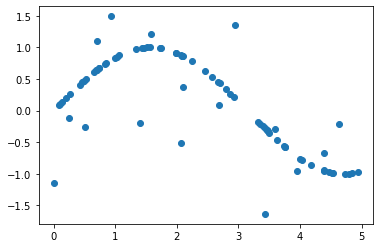

In [9]:
plt.scatter(X,y)

In [24]:
# 实例化 & 模型训练
regr_1 = tree.DecisionTreeRegressor(max_depth = 2);
regr_2 = tree.DecisionTreeRegressor(max_depth = 20);
regr_1 = regr_1.fit(X,y);
regr_2 = regr_2.fit(X,y);

In [21]:
# 测试集倒入模型，预测结果
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis];
y_1 = regr_1.predict(X_test);
y_2 = regr_2.predict(X_test);

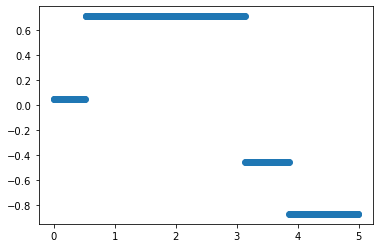

In [22]:
plt.scatter(X_test,y_1)

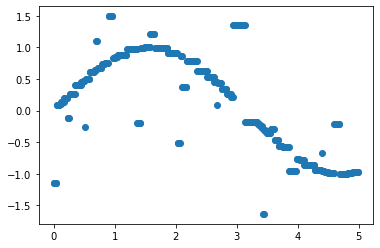

In [25]:
plt.scatter(X_test,y_2)

[Text(167.4, 181.2, 'X[0] <= 3.133\nmse = 0.547\nsamples = 80\nvalue = 0.122'),
 Text(83.7, 108.72, 'X[0] <= 0.514\nmse = 0.231\nsamples = 51\nvalue = 0.571'),
 Text(41.85, 36.23999999999998, 'mse = 0.192\nsamples = 11\nvalue = 0.052'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.148\nsamples = 40\nvalue = 0.714'),
 Text(251.10000000000002, 108.72, 'X[0] <= 3.85\nmse = 0.124\nsamples = 29\nvalue = -0.667'),
 Text(209.25, 36.23999999999998, 'mse = 0.124\nsamples = 14\nvalue = -0.452'),
 Text(292.95, 36.23999999999998, 'mse = 0.041\nsamples = 15\nvalue = -0.869')]

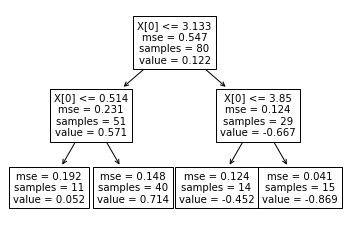

In [19]:
tree.plot_tree(regr_1)

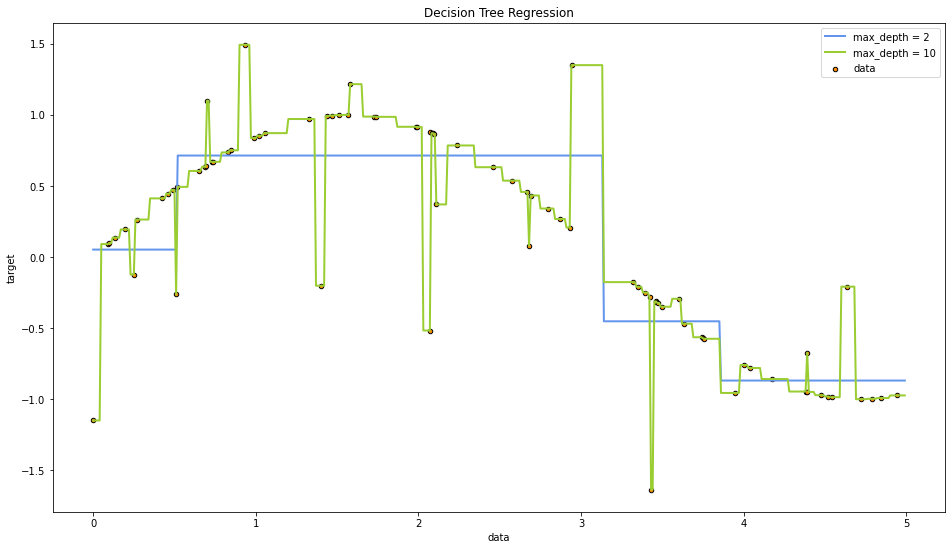

In [34]:
plt.figure(figsize = (16,9));
plt.scatter(X,y, s=20, edgecolor = 'black', c = 'darkorange', label = 'data');
plt.plot(X_test, y_1, color = 'cornflowerblue', label = "max_depth = 2", linewidth = 2);
plt.plot(X_test, y_2, color = 'yellowgreen', label = "max_depth = 10", linewidth = 2);
plt.xlabel('data')
plt.ylabel('target')
plt.title("Decision Tree Regression")
plt.legend();
plt.show()

# 案例： 泰坦尼克号幸存者的预测

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import os

In [41]:
data = pd.read_csv('Titanic_data_set/train.csv')

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [57]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
data.isna().sum()  # 非空值的多少

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
